In [2]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle

import core
import wocca
import visualize as vis
import icons

from ds2_trt import *

In [2]:
import importlib
importlib.reload(vis)

<module 'visualize' from '/data/liyichao/code/microstates/wocca_project_code/visualize.py'>

In [3]:
pickle_prefix = "../wocca_project_pickles/ds2_trt_"
bounds_fn = pickle_prefix + "bounds.pickle"
wocca_fn = pickle_prefix + "wocca.pickle"
wocca_full_fn = pickle_prefix + "wocca_full.pickle"
affinity_fn = pickle_prefix + "affinity.pickle"
affinity_full_fn = pickle_prefix + "affinity_full.pickle"

foundation_fn = pickle_prefix + "foundation.pickle"
ds2_foundation_fn = "../wocca_project_pickles/ds2_leipzig_foundation.pickle"

with open(ds2_foundation_fn, mode = "rb") as FIn:
    ds2_info = pickle.load(FIn)[0]
info_old = info.copy()
info = vis.make_calibrated_info(ds2_info, info)

### Fresh start

In [4]:
# %% Load phasemaps and segment boundaries
# NOTICE: MAY TAKE SEVERAL HOURS

v = []
bounds = [0]
ids = []

# Load data
for i in range(n_subjs):
    for j in range(n_sess):
        for k in range(n_states):
            tmp = iter_twms(i, j, k)
            v.append(tmp.data.copy())
            bounds.append(bounds[-1] + len(v[-1]))
            ids.append([i, j, k])

v = np.concatenate(v)
bounds = np.array(bounds)
ids = np.array(ids)
n_data_full, n_v = v.shape
n_segs = len(ids)

# Save bounds data as pickle
with open(bounds_fn, mode = "wb") as FOut:
    pickle.dump((ids, bounds), FOut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass 

/data/liyichao/code/microstates/wocca_project_code/ds3_trt.py:65: RuntimeWarning: This filename (../data/test_retest/ds004148-download/derivatives/preprocessed_data/preprocessed_data/sub27_03_EO.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path + fn + ".fif", preload = True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass 

/data/liyichao/code/microstates/wocca_project_code/ds3_trt.py:65: RuntimeWarning: This filename (../data/test_retest/ds004148-download/derivatives/preprocessed_data/preprocessed_data/sub28_01_EO.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path + fn + ".fif", preload = True)


    Range : 0 ... 149999 =      0.000 ...   299.998 secs
Ready.
Reading 0 ... 149999  =      0.000 ...   299.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contigu

/data/liyichao/code/microstates/wocca_project_code/ds3_trt.py:65: RuntimeWarning: This filename (../data/test_retest/ds004148-download/derivatives/preprocessed_data/preprocessed_data/sub33_02_EO.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(path + fn + ".fif", preload = True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 7.00, 13.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 13 Hz

IIR filter parameters
---------------------
Butterworth bandpass 

In [9]:
# %% Resting-state only WOCCA with pre-reduction
# NOTICE: MAY TAKE HOURS WITHOUT GPU, OR SEVERAL MINUTES WITH GPU

rs_mask = np.zeros([n_data_full], dtype = bool)
for i in range(n_segs):
    if ids[i, 2] <= 1:
        rs_mask[bounds[i] : bounds[i + 1]] = True
tmp_v_rs = v[rs_mask]

n_comps = 10
n_comps_ext = 15
n_dim_pca = 30

u, pca_basis = wocca.pca_decomp(tmp_v_rs, n_dim_pca)

# Pre-calculate b matrix using GPU
b = wocca.get_b_matrix(u, wocca.upper_triangle(n_dim_pca), use_torch = True)

# WOCCA
ws_pca = wocca.wocca(None, b = b, n_components = n_comps_ext, use_torch = True, backtrack = True)
ws = wocca.pca_recover(ws_pca[ : n_comps], pca_basis)

# Total energy and scores on resting state data
total_energy = wocca.total_energy(tmp_v_rs)
scores = wocca.score(tmp_v_rs, ws)

# Total energy by segments of full data
seg_energy = np.array([wocca.total_energy(v[bounds[i] : bounds[i + 1]]) for i in range(n_segs)])

# Finalize
del(u)
del(tmp_v_rs)

Using GPU: True
Iter 1 / 15
No. of iters 28
Score 299071.2920606128 

Iter 2 / 15
No. of iters 41
Score 269395.2447971525 

Iter 3 / 15
No. of iters 31
Score 122934.5349737774 

Iter 4 / 15
No. of iters 34
Score 68474.78932567574 

Iter 5 / 15
No. of iters 55
Score 57115.9137962787 

Iter 6 / 15
No. of iters 61
Score 36488.13393113441 

Iter 7 / 15
No. of iters 77
Score 32108.07000977834 

Iter 8 / 15
No. of iters 186
Score 30274.864403110816 

Iter 9 / 15
No. of iters 42
Score 29484.0366546211 

Iter 10 / 15
No. of iters 102
Score 25967.805724215134 

Iter 11 / 15
No. of iters 54
Score 23891.238860770885 

Iter 12 / 15
No. of iters 57
Score 23000.26441731038 

Iter 13 / 15
No. of iters 72
Score 19347.384397582704 

Iter 14 / 15
No. of iters 75
Score 18871.680607815142 

Iter 15 / 15
No. of iters 187
Score 17187.988547284942 



In [12]:
# %% Manually correct WOCCA component directions and save components

# Invert component directions to (CCw/Cw, FW/BW, RW/LW)
manual_correction = [False, True, False, True]

for i in range(len(manual_correction)):
    if manual_correction[i]:
        ws[i] = np.conj(ws[i])

# Save as pickle
with open(wocca_fn, mode = "wb") as FOut:
    pickle.dump((seg_energy, ws, scores, b), FOut)

In [14]:
# %% Calculate and save affinities to resting state WOCCA comonents

n_comp_save = 5

pm_basis = []
for i in range(n_comp_save):
    pm_basis += [ws[i], np.conj(ws[i])]
pm_basis = np.array(pm_basis)
affs = core.topomap_affinity(v, pm_basis, False, True)

# Save as pickle
with open(affinity_fn, mode = "wb") as FOut:
    pickle.dump(affs, FOut)

### Load previous results

In [4]:
# %% Reload previous results to skip the time-consuming steps

with open(bounds_fn, mode = "rb") as FIn:
    ids, bounds = pickle.load(FIn)
n_segs = len(ids)

with open(wocca_fn, mode = "rb") as FIn:
    seg_energy, ws, scores, b = pickle.load(FIn)
n_comps, n_v = ws.shape
total_energy_rs = seg_energy[ids[ : , 2] < 2].sum()

with open(affinity_fn, mode = "rb") as FIn:
    affs = pickle.load(FIn)
n_data_full = len(affs)
n_comp_save = affs.shape[1] // 2
pm_basis = []
for i in range(n_comp_save):
    pm_basis += [ws[i], np.conj(ws[i])]
pm_basis = np.array(pm_basis)

projs = np.zeros([n_data_full, n_comp_save])
for i in range(n_comp_save):
    projs[ : , i] = np.abs(affs[ : , i * 2]) ** 2 - np.abs(affs[ : , i * 2 + 1]) ** 2

In [30]:
# %% Save foundation data for quick reference

with open(foundation_fn, mode = "wb") as FOut:
    pickle.dump((info.copy(), ws, scores, total_energy_rs, "Version 231214.01"), FOut)

### Analysis

In [5]:
# %% Statistics

def average_per_session(v):
    if len(v.shape) == 1:
        res = np.zeros([n_subjs, n_sess, n_states], dtype = v.dtype)
    else:
        res = np.zeros([n_subjs, n_sess, n_states, v.shape[1]], dtype = v.dtype)

    l = 0
    for i in range(n_subjs):
        for j in range(n_sess):
            for k in range(n_states):
                res[i, j, k] = v[bounds[l] : bounds[l + 1]].mean(axis = 0)
                l += 1

    return res

def average_per_subject(v):
    if len(v.shape) == 1:
        res = np.zeros([n_subjs, n_states], dtype = v.dtype)
    else:
        res = np.zeros([n_subjs, n_states, v.shape[1]], dtype = v.dtype)
    counts = np.zeros([n_subjs, n_states], dtype = int)
    
    l = 0
    for i in range(n_subjs):
        for j in range(n_sess):
            for k in range(n_states):
                res[i, k] += v[bounds[l] : bounds[l + 1]].sum(axis = 0)
                counts[i, k] += bounds[l + 1] - bounds[l]
                l += 1

    for i in range(n_subjs):
        for j in range(n_states):
            res[i, j] /= counts[i, j]

    return res

def anova(data0, mask0 = None):
    v_arr = data0.copy().flatten()
    subj_arr = np.repeat(np.arange(n_subjs), n_sess * n_states)
    state_arr = ids[ : , 2].flatten()

    if not (mask0 is None):
        mask = mask0.copy().flatten()
        v_arr = v_arr[mask]
        subj_arr = subj_arr[mask]
        state_arr = state_arr[mask]

    data = pd.DataFrame({"value": v_arr, "subj": subj_arr, "state": state_arr})
    formula = "value~C(subj)+C(state)"
    model = smf.ols(formula, data).fit()
    anova_table = sm.stats.anova_lm(model, typ = 2)

    return anova_table

In [6]:
# %% Visualization functions

fig_path = "../wocca_project_figs/explore_trt/"
comp_labels = ["Rot.", "Long.", "Horiz.", "Lat.", "Comp.5"]
comp_names = ["rot", "fw", "rw", "fs", "c5"]
state_labels = ["EC", "EO", "MA", "ME", "MU"]
state_names_full = ["Eyes closed", "Eyes open", "Maths", "Memory", "Music"]

default_color = "#607280"
state_colors = ["#114F99", "#49ADFF", "#FF8575", "#E5B858", "#A5BF55"]
compare_colors = [["#114F99", "#49ADFF"], ["#1F8C54", "#10D99C"]]
scree_bar_wocca_color = "#4A86C8"
scree_accumulated_color = "#800E20"

pv_thres = [0.001, 0.01, 0.05]
pv_symbols = ["***", "**", "*", "n.s."]
vis.set_pv_string(pv_thres, pv_symbols)

# Draw corresponding icon
def draw_icon(k):
    plt.axis([-0.5, 0.5, -0.5, 0.5])
    if k == 0:
        icons.rotation(default_color, default_color, scale = 1 / 2.54)
    elif k == 1:
        icons.longitudinal(default_color, scale = 1 / 2.54)
    elif k == 2:
        icons.horizontal(default_color, scale = 1 / 2.54)
    else:
        icons.lateral(default_color, scale = 1 / 2.54)

# Compare EC/EO for energy
def draw_eceo_energy_bars(k, **kwargs):
    bar_means = np.array([[energy_sess[..., i, k].mean() for i in range(2)]])
    args = dict(bar_colors = compare_colors[0], scatter_colors = compare_colors[0], line_color = default_color, \
                bar_width = 3, s_size = 1, alpha_s = 0.4, alpha_l = 0.15, dpi = 100, \
                column_lims = np.array([[[0.15, 0.45], [0.8, 1.1]]]), show_xaxis = False, show_yaxis = False, \
                xps = [0.7, 0.25, None, None, None, 0.1], yps = [0.1, 2, 0.2, 0.1], bar_data = bar_means, title = None)
    args.update(kwargs)
    
    tmp = np.array([energy_subj[ : , i, k].reshape([-1, 1]) for i in range(2)])
    fig, ax, column_lims = vis.multi_compare(tmp, **args)
    
    yrng = tmp.min(), tmp.max()
    y_scale = yrng[1] - yrng[0]
    ymin = max(0, yrng[0] - y_scale * 0.05)
    plt.axis(ymin = ymin, ymax = ymin + y_scale * 1.25)
    plt.axhline(y = ymin, lw = 1, c = "#000000", clip_on = False)
    plt.axvline(x = 0, ymax = 1.1 / 1.25, lw = 1, c = "#000000", clip_on = False)

    if eceo_test_energy[k, 1] <= 0.05:
        plt.plot(column_lims[0].mean(axis = -1), [ymin + y_scale * 1.1] * 2, lw = 0.5, c = "#000000")
        plt.text(column_lims.mean(), ymin + y_scale * 1.12, vis.generate_pv_string(eceo_test_energy[k, 1], show_ns = True)[1], \
                 size = "medium", ha = "center", va = "bottom")
    
    return fig, ax, column_lims

# Compare EC/EO for asymmetry
def draw_eceo_asym_bars(k, **kwargs):
    bar_means = np.array([[asym_sess[..., i, k].mean() for i in range(2)]])
    args = dict(bar_colors = compare_colors[1], scatter_colors = compare_colors[1], line_color = default_color, \
                bar_width = 3, s_size = 1, alpha_s = 0.4, alpha_l = 0.15, dpi = 100, \
                column_lims = np.array([[[0.15, 0.45], [0.8, 1.1]]]), show_xaxis = False, show_yaxis = False, \
                xps = [0.7, 0.25, None, None, None, 0.1], yps = [0.1, 2, 0.2, 0.1], bar_data = bar_means, title = None)
    args.update(kwargs)
    
    tmp = np.array([asym_subj[ : , i, k].reshape([-1, 1]) for i in range(2)])
    fig, ax, column_lims = vis.multi_compare(tmp, **args)
    plt.axhline(y = 0, lw = 0.5, c = "#000000", zorder = -15)
    
    yrng = min(0, tmp.min()), max(0, tmp.max())
    y_scale = yrng[1] - yrng[0]
    axh = plt.axis(ymin = yrng[0] - y_scale * 0.05, ymax = yrng[1] + y_scale * 0.2)
    plt.axvline(x = 0, ymax = 1.1 / 1.25, lw = 1, c = "#000000", clip_on = False)
    
    if eceo_test_asym[k, 1] <= 0.05:
        plt.plot(column_lims[0].mean(axis = -1), [yrng[1] + y_scale * 0.05] * 2, lw = 0.5, c = "#000000")
        plt.text(column_lims.mean(), yrng[1] + y_scale * 0.07, vis.generate_pv_string(eceo_test_asym[k, 1], show_ns = True)[1], \
                 size = "medium", ha = "center", va = "bottom")
    for i in range(2):
        if zero_test_asym[i, k, 1] <= 0.05:
            pos_flag = int(zero_test_asym[i, k, 0] > 0)
            neg_flag = 1 - pos_flag
            sign_flag = pos_flag * 2 - 1
            plt.plot([column_lims[0, i, 1] + 0.15] * 2, [bar_means[0, i] - (0.03 - 0.01 * neg_flag) * y_scale, bar_means[0, i] + (0.03 - 0.01 * pos_flag) * y_scale], \
                     lw = 1.5, c = compare_colors[1][i])
            icons.draw_arrow_head([column_lims[0, i, 1] + 0.15, bar_means[0, i] + sign_flag * 0.02 * y_scale], [0, sign_flag * 0.075 * y_scale], \
                                  compare_colors[1][i], 0.075, 0)
            plt.text(column_lims[0, i, 1] + 0.15, bar_means[0, i] + (sign_flag * 0.14 - 0.005) * y_scale, \
                     vis.generate_pv_string(zero_test_asym[i, k, 1], show_ns = False)[1], \
                     size = "medium", ha = "center", va = "center", color = compare_colors[1][i], zorder = 10)

    return fig, ax, column_lims

# Compare cognitive states for energy
def draw_cog_energy_bars(k, **kwargs):
    cog_colors = [state_colors[0]] + state_colors[2 : ]
    bar_means = np.array([[energy_sess[..., i, k].mean() for i in [0, 2, 3, 4]]])
    args = dict(bar_colors = cog_colors, scatter_colors = cog_colors, bar_width = 3, s_size = 3, alpha_s = 0.3, alpha_l = 0.15, dpi = 100, \
                column_lims = np.array([[[0.15, 0.45], [0.9, 1.2], [1.35, 1.65], [1.8, 2.1]]]), show_xaxis = False, show_yaxis = False, \
                yps = [0.1, 2, 0.2, 0.1], bar_data = bar_means, title = comp_labels[k])
    args.update(kwargs)
    
    tmp = np.array([energy_subj[ : , i, k].reshape([-1, 1]) for i in [0, 2, 3, 4]])
    fig, ax, column_lims = vis.multi_compare(tmp, **args)
    
    yrng = tmp.min(), tmp.max()
    y_scale = yrng[1] - yrng[0]
    ymin = max(0, yrng[0] - y_scale * 0.05)
    plt.axis(ymin = ymin, ymax = ymin + y_scale * 1.25)
    plt.axhline(y = ymin, lw = 1, c = "#000000", clip_on = False)
    plt.axvline(x = 0, ymax = 1.1 / 1.25, lw = 1, c = "#000000", clip_on = False)
    plt.axvline(x = 0.675, ymax = 1.1 / 1.25, lw = 0.5, ls = "--", c = "#000000", zorder = 10)
    
    for i in range(3):
        pv_str = vis.generate_pv_string(cog_test_energy[i, k, 1], show_ns = True)[1]
        if cog_test_asym[i, k, 1] <= 0.05:
            pv_str += [" ↑", " ↓"][int(bar_means[0, i + 1] < bar_means[0, 0])]
        plt.text(column_lims[0, i + 1].mean(), ymin + y_scale * 1.12, pv_str, \
                 size = "medium", ha = "center", va = "bottom")
    
    return fig, ax, column_lims

# Compare cognitive states for asymmetry
def draw_cog_asym_bars(k, **kwargs):
    cog_colors = [state_colors[0]] + state_colors[2 : ]
    bar_means = np.array([[asym_sess[..., i, k].mean() for i in [0, 2, 3, 4]]])
    args = dict(bar_colors = cog_colors, scatter_colors = cog_colors, bar_width = 3, s_size = 3, alpha_s = 0.3, alpha_l = 0.15, dpi = 100, \
                column_lims = np.array([[[0.15, 0.45], [0.9, 1.2], [1.55, 1.85], [2.2, 2.5]]]), show_xaxis = False, show_yaxis = False, \
                xps = [0.7, 0.25, None, None, None, 0.1], yps = [0.1, 2, 0.2, 0.1], bar_data = bar_means, title = comp_labels[k])
    args.update(kwargs)
    
    tmp = np.array([asym_subj[ : , i, k].reshape([-1, 1]) for i in [0, 2, 3, 4]])
    fig, ax, column_lims = vis.multi_compare(tmp, **args)
    plt.axhline(y = 0, lw = 0.5, c = "#000000", zorder = -15)
    
    yrng = min(0, tmp.min()), max(0, tmp.max())
    y_scale = yrng[1] - yrng[0]
    plt.axis(ymin = yrng[0] - y_scale * 0.05, ymax = yrng[1] + y_scale * 0.2)
    plt.axvline(x = 0, ymax = 1.1 / 1.25, lw = 1, c = "#000000", clip_on = False)
    plt.axvline(x = 0.675, ymax = 1.1 / 1.25, lw = 0.5, ls = "--", c = "#000000", zorder = 10)
    
    for i in range(3):
        pv_str = vis.generate_pv_string(cog_test_asym[i, k, 1], show_ns = True)[1]
        if cog_test_asym[i, k, 1] <= 0.05:
            pv_str += [" ↑", " ↓"][int(bar_means[0, i + 1] < bar_means[0, 0])]
        plt.text(column_lims[0, i + 1].mean(), yrng[1] + y_scale * 0.07, pv_str, \
                 size = "medium", ha = "center", va = "bottom")
        
        if zero_test_asym[i + 2, k, 1] <= 0.05:
            sign_flag = int(zero_test_asym[i + 2, k, 0] > 0)
            plt.text(column_lims[0, i + 1, 1] + 0.15, bar_means[0, i + 1], ["↓", "↑"][sign_flag], \
                     size = "medium", ha = "center", va = "center", color = state_colors[i + 2], zorder = 10)
            plt.text(column_lims[0, i + 1, 1] + 0.15, bar_means[0, i + 1] + 0.1 * y_scale * (sign_flag * 2 - 1), \
                     vis.generate_pv_string(zero_test_asym[i + 2, k, 1], show_ns = False)[1], \
                     size = "medium", ha = "center", va = "center", color = state_colors[i + 2], zorder = 10)

    return fig, ax, column_lims

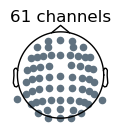

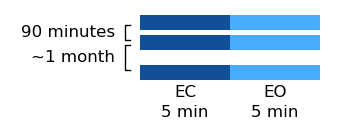

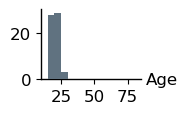

In [11]:
# %% Draw dataset structure diagram

# Channel layout
fx, fy = 1, 1.2
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0, 0, 1 / fx, 1 / fy])
vis.disp_topomap(info, np.zeros([n_v]), cmap = vis.whites_cmap, colorbar = False, sensors = False)
tmp_pos = vis.get_phys_pos(info)
plt.scatter(tmp_pos[ : , 0], tmp_pos[ : , 1], s = 20, marker = "o", color = default_color)
fig.text(0.5 / fx, 1 / fy, "{:} channels".format(n_v), ha = "center", va = "bottom", size = "large")

fig.savefig(fig_path + "trt_channel_layout.svg", format = "svg")

# Dataset structure
fx, fy = 3.2, 1.2
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0, 0, 1, 1])
plt.axis([0, 3.2, 0, 1.2])
vis.no_axes(ax)
for pos_x, pos_y, state in [[1.3, 1, 0], [2.2, 1, 1], [1.3, 0.8, 0], [2.2, 0.8, 1], [1.3, 0.5, 0], [2.2, 0.5, 1]]:
    rect = mpl.patches.Rectangle([pos_x, pos_y], 0.9, 0.15, lw = 0, ec = "#00000000", fc = state_colors[state], zorder = 15, clip_on = False)
    ax.add_patch(rect)
plt.text(1.75, 0.3, "EC", ha = "center", va = "bottom", size = "large")
plt.text(2.65, 0.3, "EO", ha = "center", va = "bottom", size = "large")
plt.text(1.75, 0.1, "5 min", ha = "center", va = "bottom", size = "large")
plt.text(2.65, 0.1, "5 min", ha = "center", va = "bottom", size = "large")
plt.plot([1.2, 1.15, 1.15, 1.2], [1.05, 1.05, 0.9, 0.9], lw = 1, c = "#000000")
plt.plot([1.2, 1.15, 1.15, 1.2], [0.85, 0.85, 0.6, 0.6], lw = 1, c = "#000000")
plt.text(1.05, 0.975, "90 minutes", ha = "right", va = "center", size = "large")
plt.text(1.05, 0.725, "~1 month", ha = "right", va = "center", size = "large")
fig.savefig(fig_path + "trt_dataset_diagram.svg", format = "svg")

# Age distribution
ages = get_age(subj_ids)

fx, fy = 1.75, 1.05
fig = plt.figure(figsize = [fx, fy])
ax = plt.axes([0.35 / fx, 0.3 / fy, 1 / fx, 0.7 / fy])
plt.axis(xmin = 10, xmax = 85)
tmp_h, tmp_b = np.histogram(ages, range = [10, 85], bins = 15)
plt.bar(tmp_b[ : -1] + 2.5, tmp_h, width = 5, color = default_color)
ax.tick_params(labelsize = "large")
vis.lower_left(ax)
fig.text(1.4 / fx, 0.3 / fy, "Age", ha = "left", va = "center", size = "large")
fig.savefig(fig_path + "trt_dataset_age.svg", format = "svg")

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 61
Could not find a adjacency matrix 

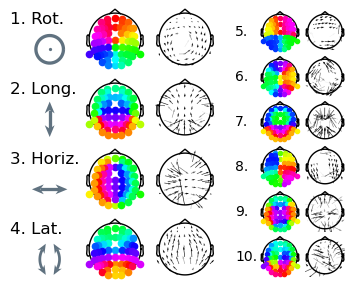

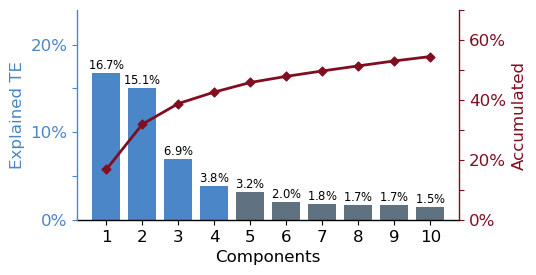

In [12]:
# %% Draw WOCCA components

# Draw phasemaps
fx, fy = 3.35, 2.7
fig = plt.figure(figsize = [fx, fy])
for i in range(4):
    fig.text(0, (0.7 * (3 - i) + 0.5) / fy, "{:}. {:}".format(i + 1, comp_labels[i]), ha = "left", va = "center", size = "large")
    ax = plt.axes([0.75 / fx, 0.7 * (3 - i) / fy, 0.6 / fx, 0.6 / fy])
    vis.disp_phasemap(info, ws[i], markersize = 9)
    ax = plt.axes([1.45 / fx, 0.7 * (3 - i) / fy, 0.6 / fx, 0.6 / fy])
    vis.disp_quiver_map(info, ws[i], show_r2 = True, sensors = False, scale = 60, width = 0.01)
    ax = plt.axes([0.2 / fx, 0.7 * (3 - i) / fy, (1 / 2.54) / fx, (1 / 2.54) / fy])
    vis.no_axes(ax)
    draw_icon(i)
for i in range(4, 10):
    fig.text(2.25 / fx, (0.45 * (9 - i) + 0.225) / fy, "{:}.".format(i + 1), ha = "left", va = "center", size = "medium")
    ax = plt.axes([2.5 / fx, (0.45 * (9 - i) + 0.025) / fy, 0.4 / fx, 0.4 / fy])
    vis.disp_phasemap(info, ws[i], markersize = 6)
    ax = plt.axes([2.95 / fx, (0.45 * (9 - i) + 0.025) / fy, 0.4 / fx, 0.4 / fy])
    vis.disp_quiver_map(info, ws[i], show_r2 = True, sensors = False, scale = 40, width = 0.015)
fig.savefig(fig_path + "wocca_rs_comps.svg", format = "svg")

# Draw scree plot
wocca_scores = scores[ : 10] / total_energy_rs

fig, ax, ax2 = vis.draw_scree_plot(wocca_scores, dpi = 100, text = True, xps = [0.8, 0.15, 0.28, 0.08, 0.8], yps = [0.3, 0.2, 2.1, 0.1], \
                                   xlabel = "Components", classes = np.array([0] * 4 + [1] * 6), class_colors = [scree_bar_wocca_color, default_color], \
                                   yaxis_color = scree_bar_wocca_color, acc_color = scree_accumulated_color)
ax.axis(ymax = 0.24)
ax.set_yticks(np.arange(5) * 0.05)
ax.set_yticklabels([r"0%", "", r"10%", "", r"20%"])
ax2.axis(ymax = 0.7)
ax2.set_yticks(np.arange(8) * 0.1)
ax2.set_yticklabels([r"0%", "", r"20%", "", r"40%", "", r"60%", ""])

fig.savefig(fig_path + "wocca_rs_scree.svg", format = "svg")

In [7]:
# %% Statistics

# Calculate session and subject means
asym_sess = average_per_session(projs)
asym_subj = average_per_subject(projs)
energy_sess = average_per_session(projs ** 2)
energy_subj = average_per_subject(projs ** 2)

# Testing EC/EO comparisons
eceo_test_asym = np.zeros([n_comp_save, 3])
eceo_test_energy = np.zeros_like(eceo_test_asym)
tmp_eceo_ids = (ids[ : , 2] == 0) | (ids[ : , 2] == 1)
for i in range(n_comp_save):
    tmp_anova = anova(asym_sess[..., i], tmp_eceo_ids)
    eceo_test_asym[i, : 2] = tmp_anova["F"].at["C(state)"], tmp_anova["PR(>F)"].at["C(state)"]
    eceo_test_asym[i, 2] = tmp_anova["sum_sq"].at["C(state)"] / (tmp_anova["sum_sq"].at["C(state)"] + tmp_anova["sum_sq"].at["Residual"])
    tmp_anova = anova(energy_sess[..., i], tmp_eceo_ids)
    eceo_test_energy[i, : 2] = tmp_anova["F"].at["C(state)"], tmp_anova["PR(>F)"].at["C(state)"]
    eceo_test_energy[i, 2] = tmp_anova["sum_sq"].at["C(state)"] / (tmp_anova["sum_sq"].at["C(state)"] + tmp_anova["sum_sq"].at["Residual"])

# Testing cognitive states against EC
cog_test_asym = np.zeros([3, n_comp_save, 3])
cog_test_energy = np.zeros_like(cog_test_asym)
for i in range(3):
    tmp_cog_ids = (ids[ : , 2] == 0) | (ids[ : , 2] == i + 2)
    for j in range(n_comp_save):
        tmp_anova = anova(asym_sess[..., j], tmp_cog_ids)
        cog_test_asym[i, j, : 2] = tmp_anova["F"].at["C(state)"], tmp_anova["PR(>F)"].at["C(state)"]
        cog_test_asym[i, j, 2] = tmp_anova["sum_sq"].at["C(state)"] / (tmp_anova["sum_sq"].at["C(state)"] + tmp_anova["sum_sq"].at["Residual"])
        tmp_anova = anova(energy_sess[..., j], tmp_cog_ids)
        cog_test_energy[i, j, : 2] = tmp_anova["F"].at["C(state)"], tmp_anova["PR(>F)"].at["C(state)"]
        cog_test_energy[i, j, 2] = tmp_anova["sum_sq"].at["C(state)"] / (tmp_anova["sum_sq"].at["C(state)"] + tmp_anova["sum_sq"].at["Residual"])

# Testing asymmetry against zero
zero_test_asym = np.zeros([5, n_comp_save, 3])
for i in range(5):
    for j in range(n_comp_save):
        zero_test_asym[i, j, : 2] = stats.ttest_1samp(asym_subj[ : , i, j], 0)
        zero_test_asym[i, j, 2] = asym_subj[ : , i, j].mean() / asym_subj[ : , i, j].std(ddof = 1)

print(eceo_test_energy, eceo_test_asym, zero_test_asym, sep = "\n")

[[2.47383487e+02 4.90946857e-41 4.52765307e-01]
 [5.45865924e+02 2.06953561e-69 6.46097693e-01]
 [3.71570109e+00 5.48500320e-02 1.22745569e-02]
 [2.40002745e+00 1.22390894e-01 7.96293042e-03]
 [1.30233841e+01 3.60508671e-04 4.17384875e-02]]
[[5.31613296e+00 2.18130626e-02 1.74691131e-02]
 [2.12075531e+01 6.10441074e-06 6.62306459e-02]
 [1.91016596e+01 1.71199412e-05 6.00489151e-02]
 [7.41168409e+01 4.27665211e-16 1.98642443e-01]
 [1.52954258e+01 1.13830580e-04 4.86657602e-02]]
[[[-1.42058563e+00  1.60700689e-01 -1.83396816e-01]
  [-3.01326616e+00  3.80416004e-03 -3.89010988e-01]
  [ 2.19091374e+00  3.24202135e-02  2.82845747e-01]
  [-6.39872320e+00  2.79306592e-08 -8.26071613e-01]
  [-1.77896432e+00  8.03970919e-02 -2.29663306e-01]]

 [[-1.08537015e+00  2.82172705e-01 -1.40120684e-01]
  [-3.14732711e+00  2.58336288e-03 -4.06318182e-01]
  [-2.14173830e-01  8.31149986e-01 -2.76497226e-02]
  [-3.52796313e+00  8.18182592e-04 -4.55458081e-01]
  [ 5.05658822e-01  6.14980194e-01  6.52802733e-

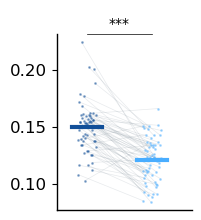

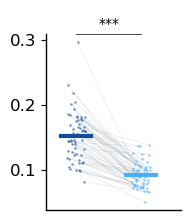

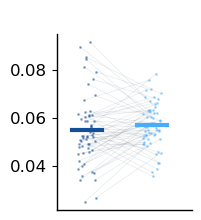

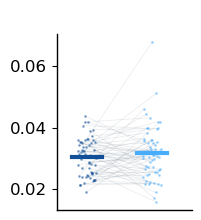

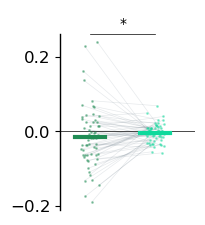

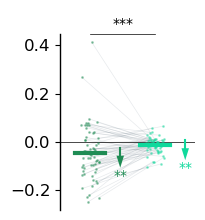

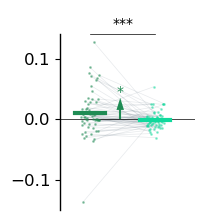

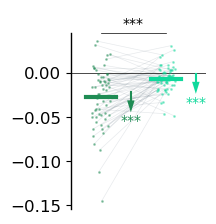

In [14]:
# %% Draw EC/EO comparisons

# Energy
yticks = [[0.1, 0.15, 0.2], \
          [0.1, 0.2, 0.3], \
          [0.04, 0.06, 0.08], \
          [0.02, 0.04, 0.06]]
for i in range(4):
    fig, ax, column_lims = draw_eceo_energy_bars(i)
    ax.set_yticks(yticks[i])
    fig.savefig(fig_path + "eceo_energy_comp{:}.svg".format(i + 1), format = "svg")

# Asymmetry
yticks = [[-0.2, 0, 0.2], \
          [-0.2, 0, 0.2, 0.4], \
          [-0.1, 0, 0.1], \
          [-0.15, -0.1, -0.05, 0]]
for i in range(4):
    fig, ax, column_lims = draw_eceo_asym_bars(i)
    ax.set_yticks(yticks[i])
    fig.savefig(fig_path + "eceo_asym_comp{:}.svg".format(i + 1), format = "svg")

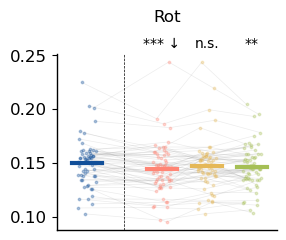

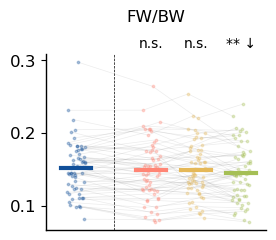

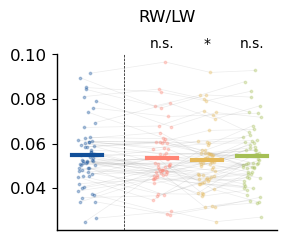

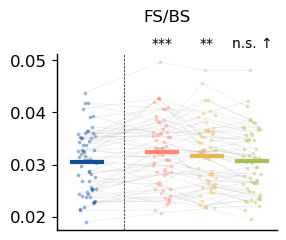

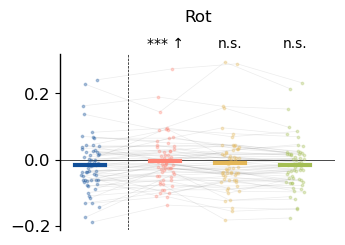

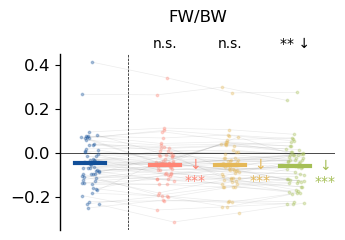

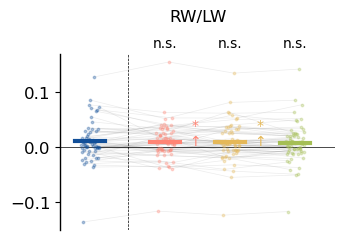

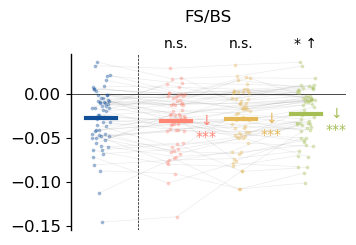

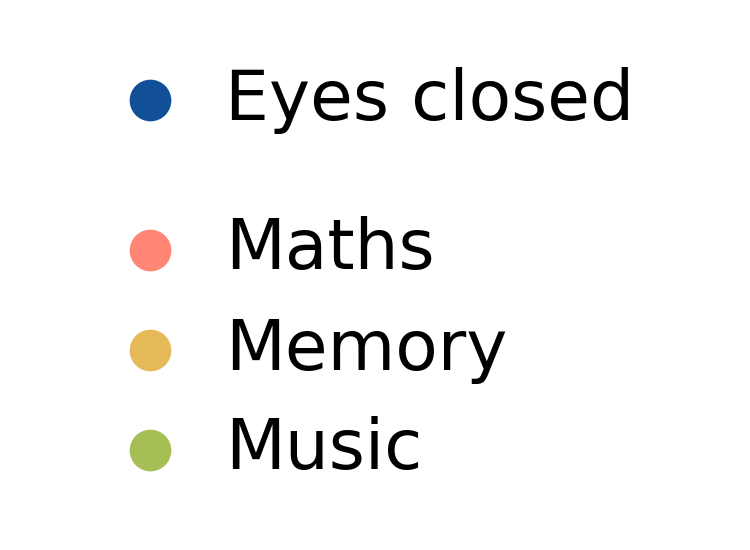

In [18]:
# %% Draw cognitive state comparisons

# Energy
yticks = [[0.1, 0.15, 0.2, 0.25], \
          [0.1, 0.2, 0.3], \
          [0.04, 0.06, 0.08, 0.1], \
          [0.02, 0.03, 0.04, 0.05]]
for i in range(4):
    fig, ax, column_lims = draw_cog_energy_bars(i)
    ax.set_yticks(yticks[i])
    fig.savefig(fig_path + "cog_energy_comp{:}.svg".format(i + 1), format = "svg")

# Asymmetry
yticks = [[-0.2, 0, 0.2], \
          [-0.2, 0, 0.2, 0.4], \
          [-0.1, 0, 0.1], \
          [-0.15, -0.1, -0.05, 0]]
for i in range(4):
    fig, ax, column_lims = draw_cog_asym_bars(i)
    ax.set_yticks(yticks[i])
    fig.savefig(fig_path + "cog_asym_comp{:}.svg".format(i + 1), format = "svg")

# Cognitive state legends
fig = plt.figure(figsize = [1.3, 0.9], dpi = 500)
ax = plt.axes([0, 0, 1, 1])
vis.no_axes(ax)
plt.axis([0, 1.3, 0, 0.9])
plt.scatter([0.2], [0.8], s = 25, c = state_colors[0])
plt.text(0.35, 0.8, state_names_full[0], ha = "left", va = "center", size = "medium")
for i in range(3):
    plt.scatter([0.2], [0.5 - i * 0.2], s = 25, c = state_colors[i + 2])
    plt.text(0.35, 0.5 - i * 0.2, state_names_full[i + 2], ha = "left", va = "center", size = "medium")
fig.savefig(fig_path + "cog_scatter_legends.svg", format = "svg")